#Covid-19 Pre-existing Medical Condition Analysis using Plotly Express, Choropleth maps and WordCloud Text Visualization

##Task 1 : Importing all the necessary libraries

In [6]:
import pandas as pd       #Data analysis and Manipulation
import plotly.express as px    #Data Visualization (one line of code for one graph) 
import matplotlib.pyplot as plt   #Data Visualization for WordCloud
from wordcloud import WordCloud   #Wordcloud Text Visualization


In [7]:
import plotly.io as pio
pio.renderers.default = 'colab'     # To initialize plotly (default mode of plotly if OFF as it consumes a lot of space)

##Task 2 : Importing the dataset and Visualizing it (Dataset 1 : Worldometer dataset)

In [ ]:
from google.colab import files
files.upload()

In [9]:
df = pd.read_csv('covid_worldometer_data.csv')
df

,S.no,Country,TotalCases,TotalDeaths,Total Recovered,Active cases,Totalcases/1M,TotalDeath/1M,iso_alpha
0,1,USA,"23,848,410","397,994","14,112,119","9,338,297","71,822","1,199",USA
1,2,India,"10,528,508","151,954","10,162,738","213,816","7,589",110,IND
2,3,Brazil,"8,326,115","207,160","7,339,703","779,252","39,021",971,BRA
3,4,Russia,"3,495,816","63,940","2,882,044","549,832","23,949",438,RUS
4,5,UK,"3,260,258","86,015","1,406,967","1,767,276","47,890","1,263",UKR
...,...,...,...,...,...,...,...,...,...
216,217,Wallis and Futuna,4,,1,3,359,NaN,WLF
217,218,Samoa,2,,2,0,10,NaN,WSM
218,219,Micronesia,1,,NaN,1,9,NaN,FSM
219,220,Vanuatu,1,,1,0,3,NaN,VUT


In [10]:
px.bar(df, x = 'Country', y = 'TotalCases', color = 'Country')

In [11]:
px.bar(df.head(15), x = 'Country', y = 'TotalCases', color = 'Country')

In [12]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [13]:
px.scatter(df.head(20), x = 'Totalcases/1M', y = 'TotalDeath/1M', color = 'Country')

##Task 3: Geographic Visualization using Choropleth maps

In [14]:
# A choropleth map displays divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable. 
#Amazing Representation of data in a map . Choropleth maps provide an easy way to visualize how a measurement varies across a geographic area.

In [15]:
df.columns

Index(['S.no', 'Country', 'TotalCases', 'TotalDeaths', 'Total Recovered',
       'Active cases', 'Totalcases/1M', 'TotalDeath/1M', 'iso_alpha'],
      dtype='object')

In [16]:
px.choropleth(df, locations = 'iso_alpha', hover_name = 'Country', color = 'TotalDeath/1M', projection = 'orthographic', color_continuous_scale = 'Viridis')

In [17]:
px.choropleth(df, locations = 'iso_alpha', hover_name = 'Country', color = 'TotalDeath/1M', projection = 'equirectangular', color_continuous_scale = 'Plasma')

In [18]:
px.choropleth(df, locations = 'iso_alpha', hover_name = 'Country', color = 'TotalDeath/1M', scope = 'asia', color_continuous_scale = 'Plasma')

##Task 4: Importing and Analyzing the dataset(Dataset 2: Covid-19 Pre-existing condition Medical dataset; source: CDC,US)

In [ ]:
from google.colab import files
files.upload()

In [20]:
df1 = pd.read_csv('US_medical_data.csv')

In [ ]:
df1

In [23]:
df1.groupby('Age Group').count()

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,COVID-19 Deaths,Number of Mentions,Flag
Age Group,,,,,,,,,,
0-24,1242,1242,1242,1242,1242,1242,1242,804,812,438
25-34,1242,1242,1242,1242,1242,1242,1242,654,670,588
35-44,1242,1242,1242,1242,1242,1242,1242,679,700,563
45-54,1242,1242,1242,1242,1242,1242,1242,816,837,426
55-64,1242,1242,1242,1242,1242,1242,1242,960,971,282
65-74,1242,1242,1242,1242,1242,1242,1242,1081,1092,161
75-84,1242,1242,1242,1242,1242,1242,1242,1126,1131,116
85+,1242,1242,1242,1242,1242,1242,1242,1101,1108,141
All Ages,1242,1242,1242,1242,1242,1242,1242,1203,1206,39


##Task 5: Visualizing the Pre-existing condition Medical dataset

In [24]:
filter1 = df1[(df1['State']=='US')]

In [25]:
filter1

,Data as of,Start Week,End Week,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,198.0,205.0,NaN
1,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,968.0,985.0,NaN
2,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,2537.0,2584.0,NaN
3,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,7369.0,7555.0,NaN
4,1/10/2021,1/4/2020,1/9/2021,US,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,18378.0,18829.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
225,1/10/2021,1/4/2020,1/9/2021,US,COVID-19,COVID-19,U071,65-74,68686.0,68686.0,NaN
226,1/10/2021,1/4/2020,1/9/2021,US,COVID-19,COVID-19,U071,75-84,88685.0,88685.0,NaN
227,1/10/2021,1/4/2020,1/9/2021,US,COVID-19,COVID-19,U071,85+,103139.0,103139.0,NaN
228,1/10/2021,1/4/2020,1/9/2021,US,COVID-19,COVID-19,U071,Not stated,6.0,6.0,NaN


In [26]:
px.bar(df1, x = 'Age Group', y = 'COVID-19 Deaths', color = 'Condition', hover_name = 'Condition', log_y = True)

In [27]:
px.bar(filter1, x = 'Age Group', y = 'COVID-19 Deaths', color = 'Condition Group', hover_name = 'Condition')

In [28]:
filter2 = df1[(df1['State']=='US') & (df1['Age Group']=='All Ages')]

In [32]:
filter2.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [33]:
px.bar(filter2, x = 'Condition Group', y = 'COVID-19 Deaths', color = 'COVID-19 Deaths', hover_name = 'Condition')

In [37]:
filter3 = df1[(df1['Condition']=='Influenza and pneumonia') & (df1['Age Group']=='All Ages')]

In [39]:
filter3.columns

Index(['Data as of', 'Start Week', 'End Week', 'State', 'Condition Group',
       'Condition', 'ICD10_codes', 'Age Group', 'COVID-19 Deaths',
       'Number of Mentions', 'Flag'],
      dtype='object')

In [41]:
px.bar(filter3, x = 'State', y = 'COVID-19 Deaths', color = 'State', log_y = True)

##Task 6: WordCloud Text Visualization

In [29]:
#Step a= Convert the columns with conditions and condition group into list using tolist() function
#Step b= Convert the list to one single string
#Step c= Convert the string into WordCloud
# WordCloud imported in task 1. # WordCloud visualization needs matplotlib

###WordCloud 1- Condition group

In [ ]:
filter2

In [52]:
list1 = filter2['Condition Group'].tolist()

In [89]:
string1 = "".join(list1)

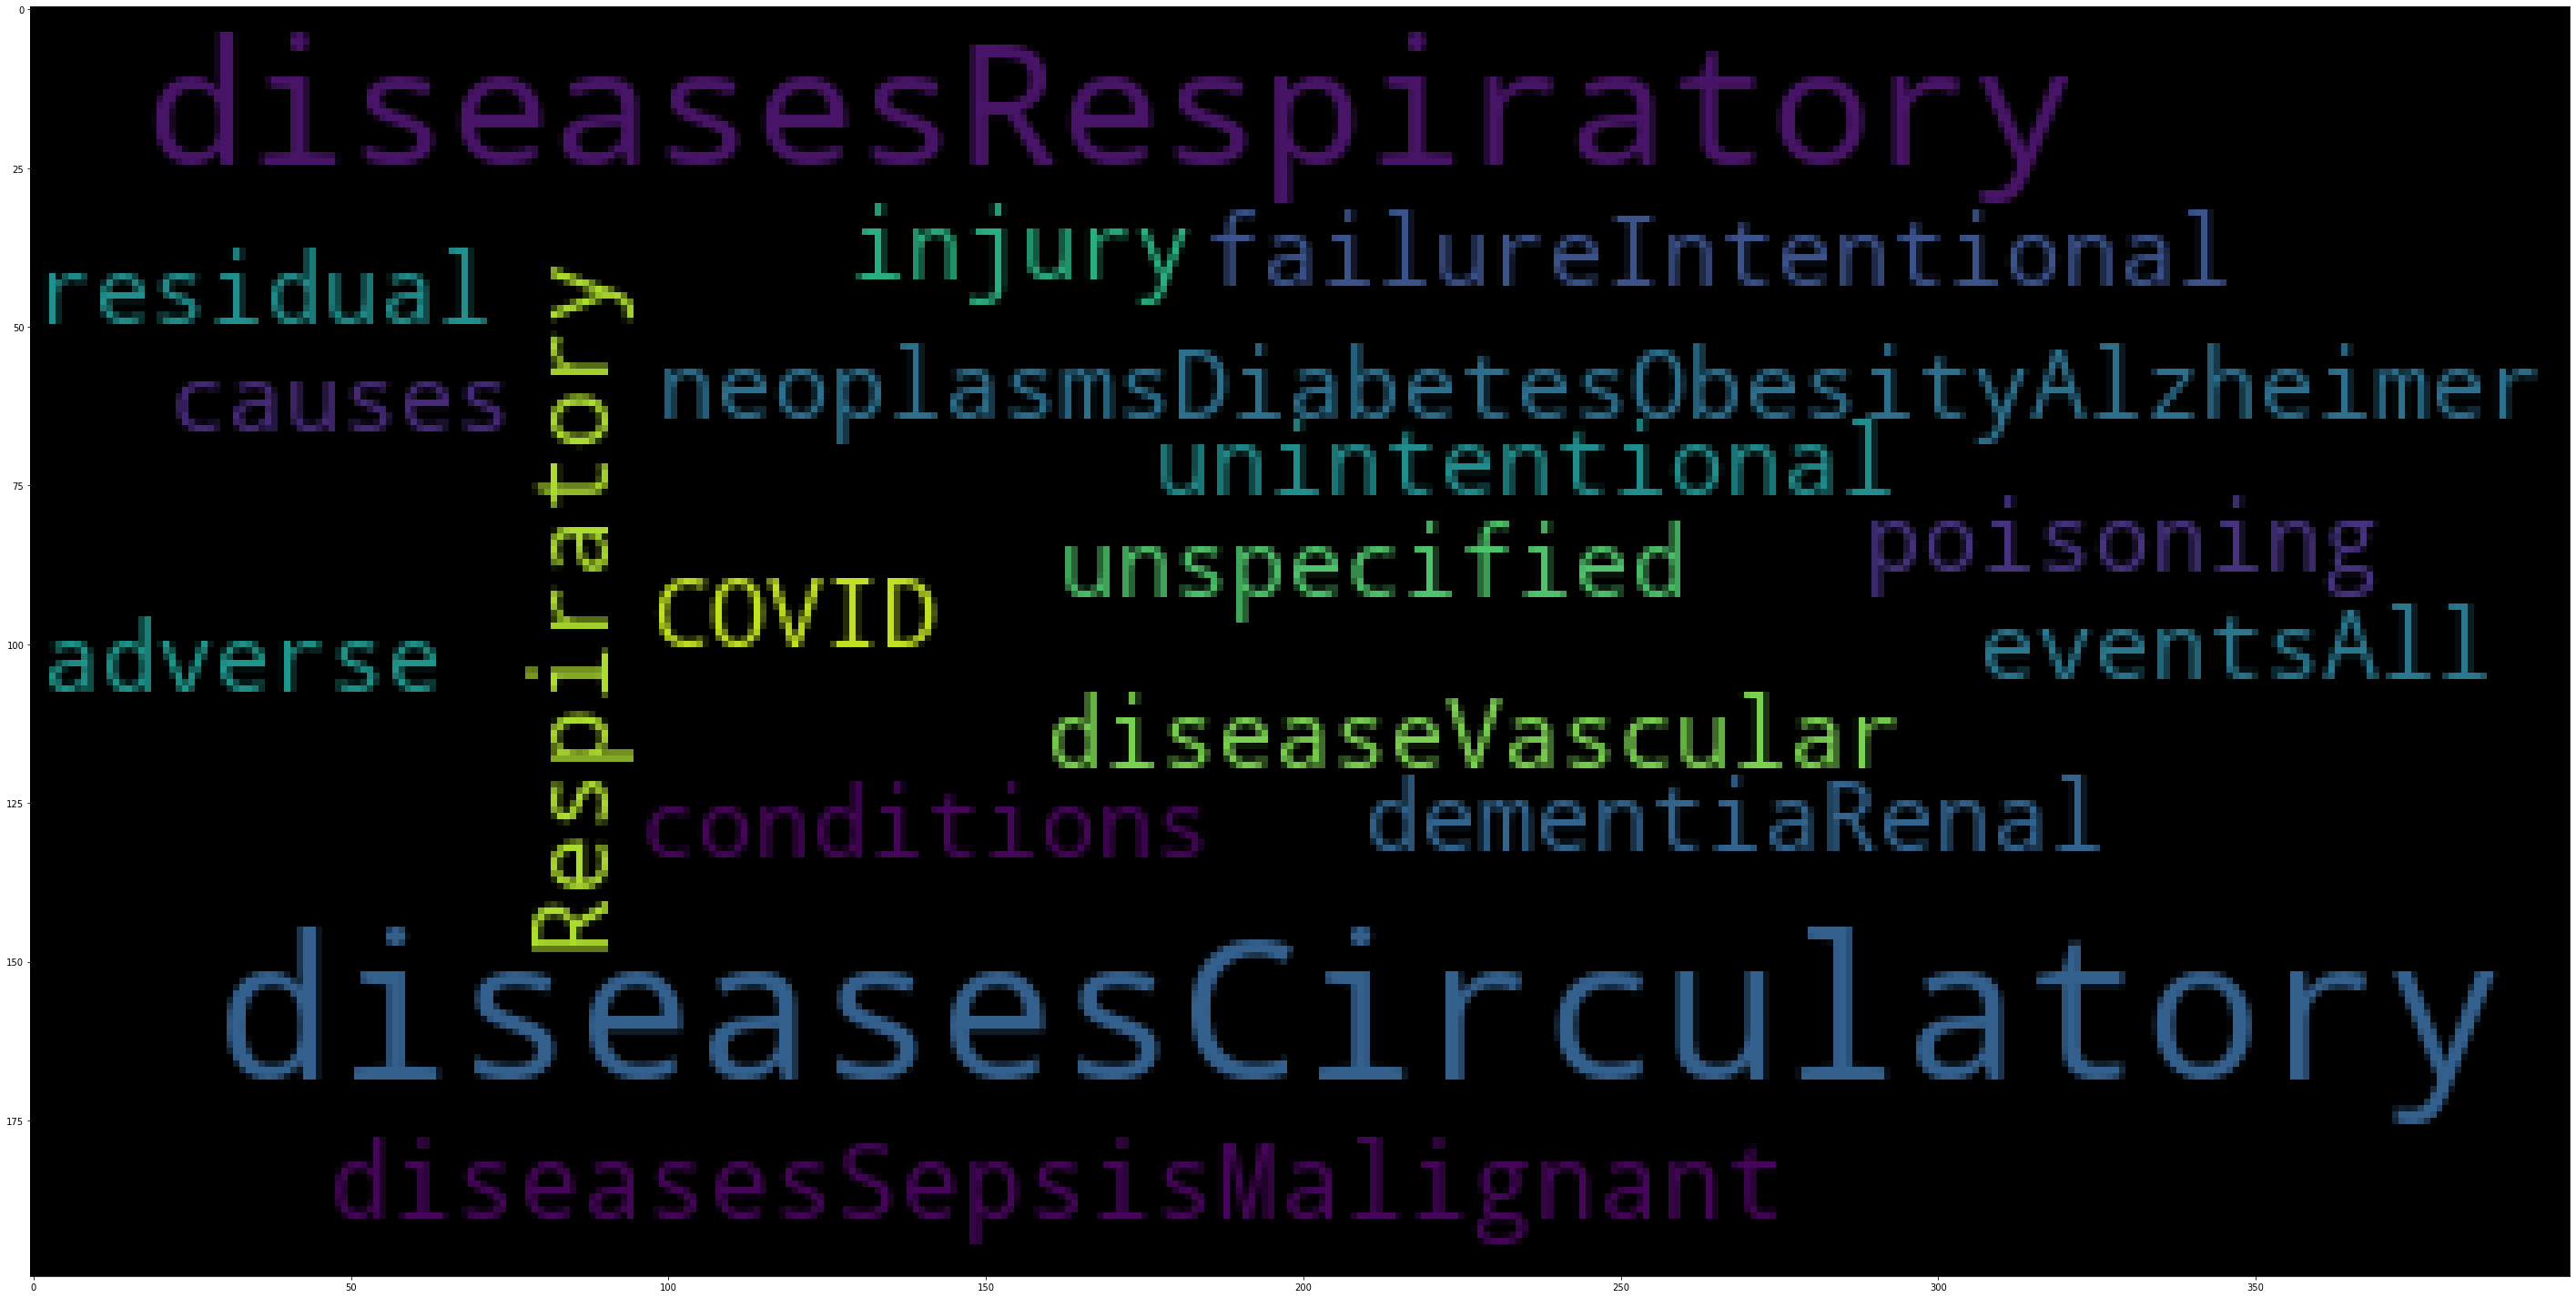

In [90]:
plt.figure(figsize=(50,50))
plt.imshow(WordCloud().generate(string1))

###WordCloud 2- Conditions

In [73]:
list2 = df1['Condition'].tolist()

In [91]:
string2 = "".join(list2)

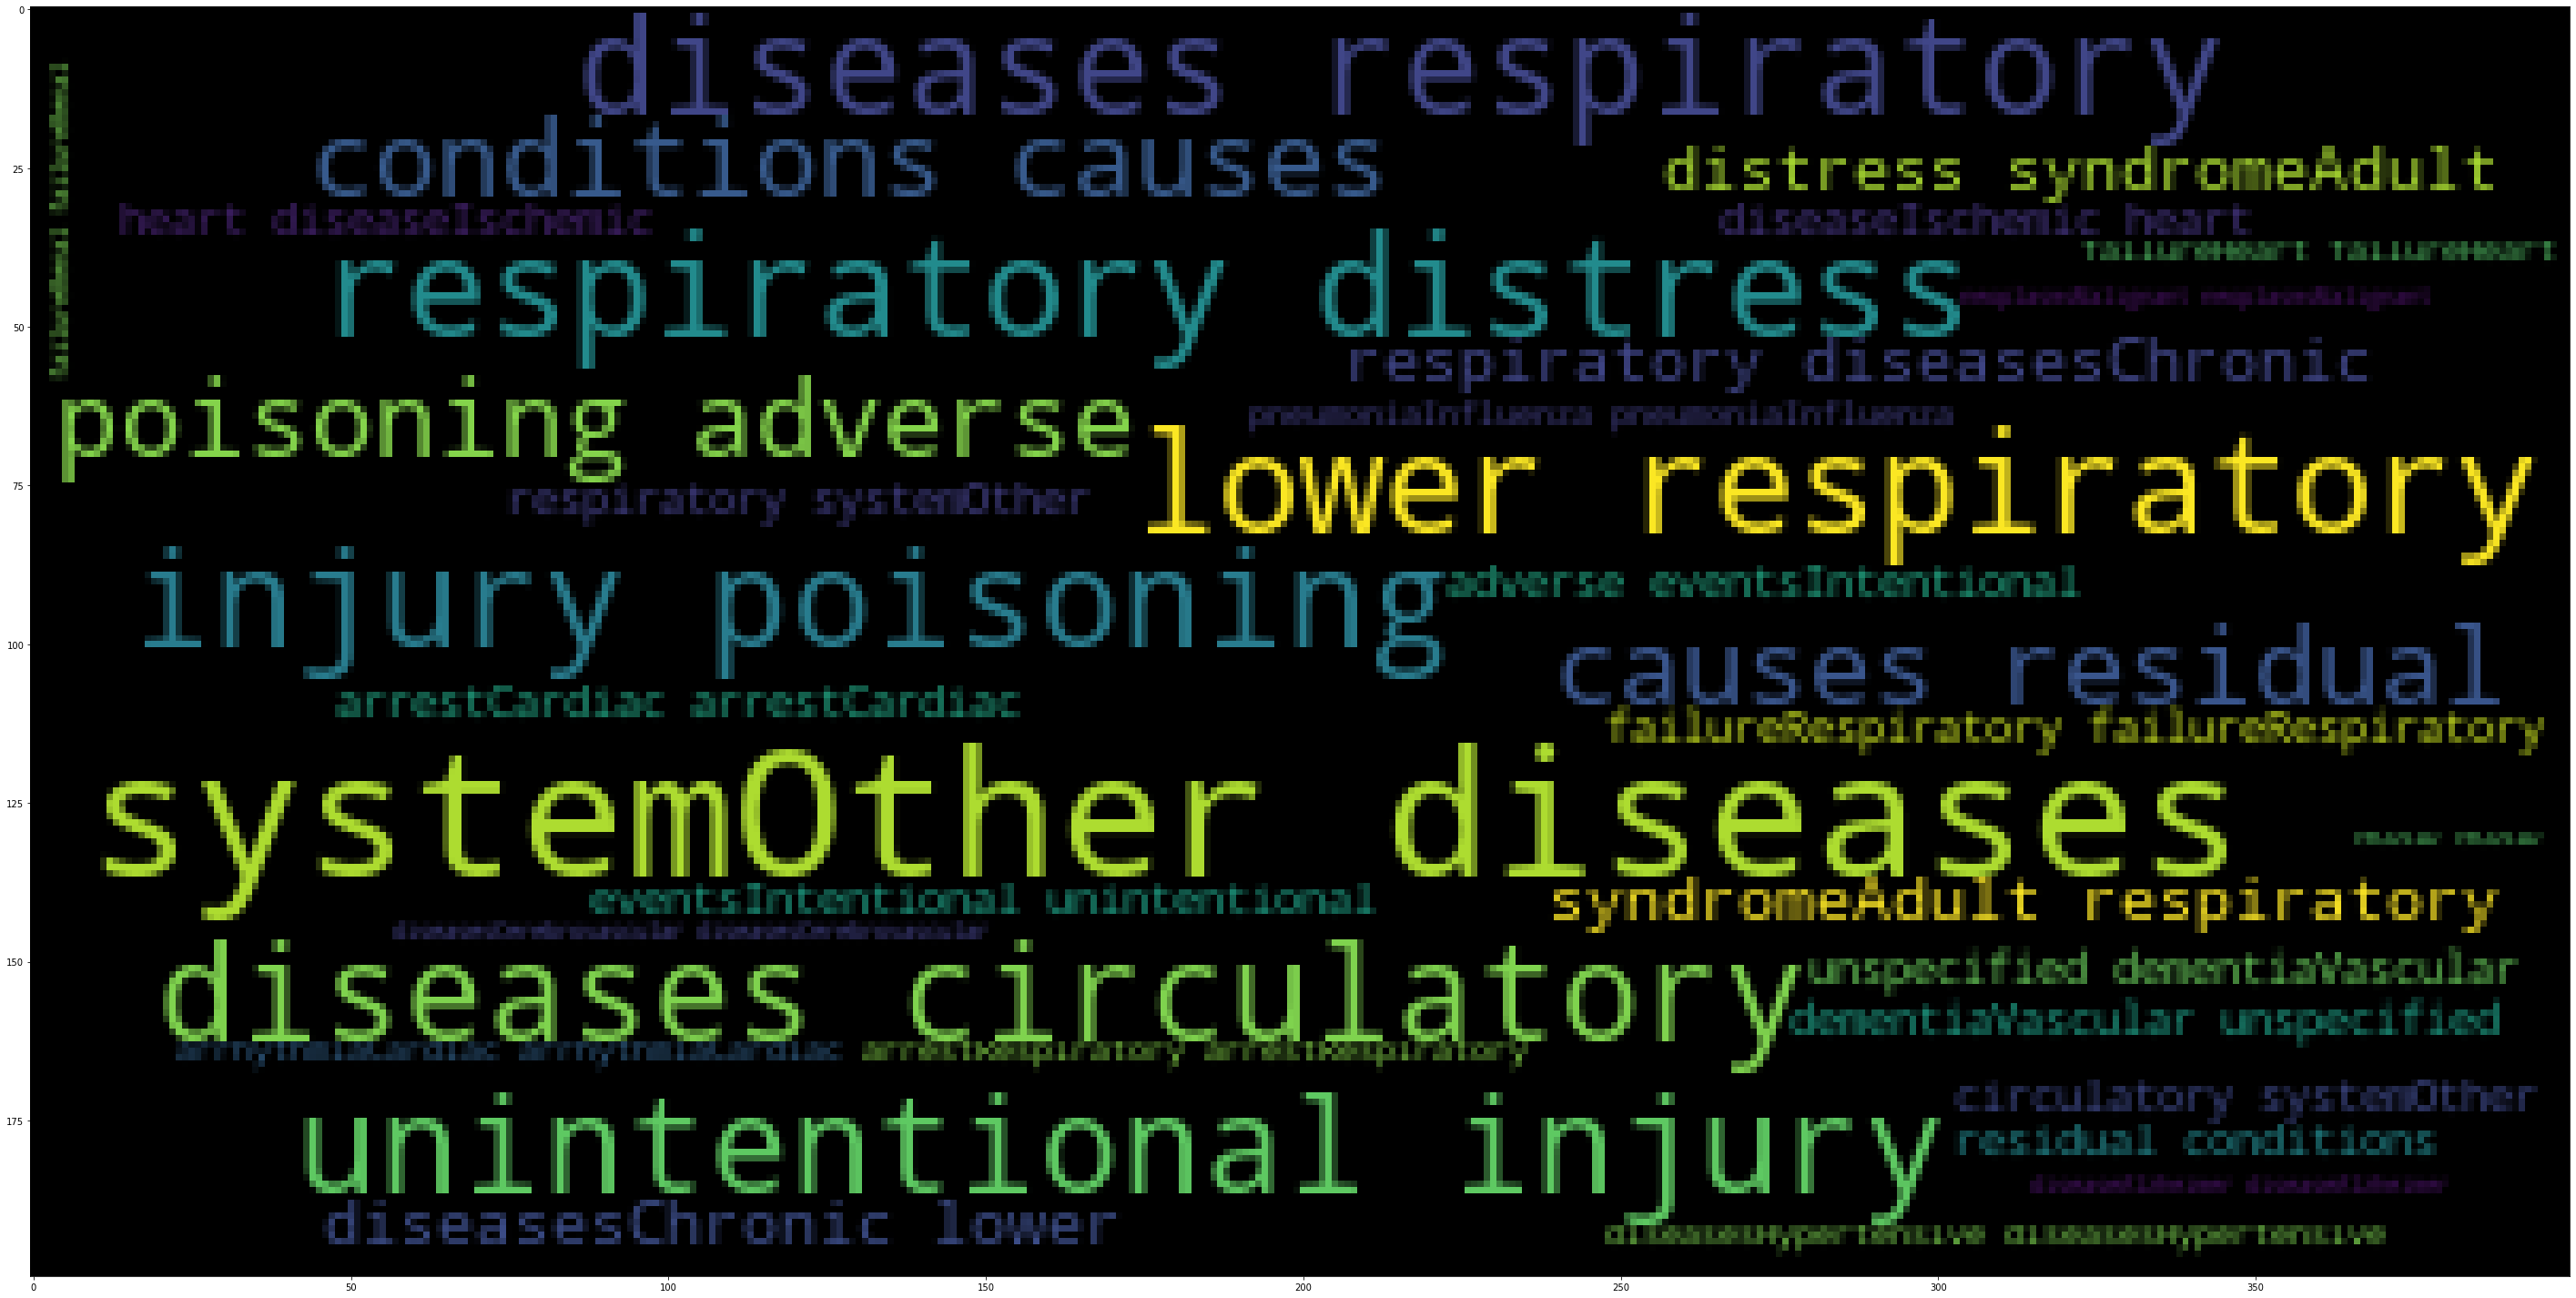

In [92]:
plt.figure(figsize=(50,50))
plt.imshow(WordCloud().generate(string2))